In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
store_df=pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
train_df=pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv',low_memory=False)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
test_df=pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [23]:
merged_train_df=pd.merge(store_df,train_df,on='Store',how='left')
merged_train_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [19]:
merged_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [24]:
merged_test_df=test_df.merge(store_df,how='left')
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [34]:
sns.set_style('darkgrid')

[]

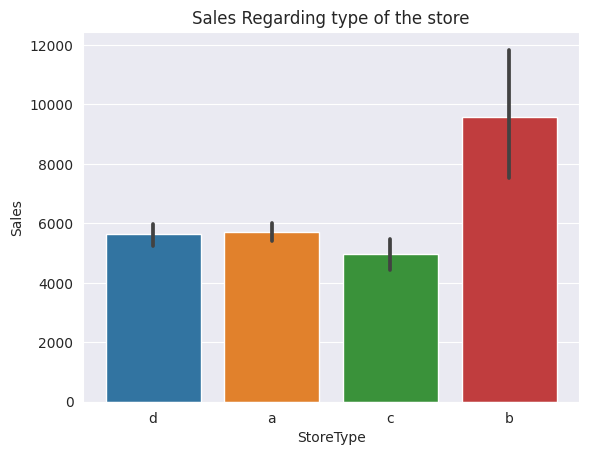

In [35]:
sns.barplot(merged_train_df.sample(1000),x='StoreType',y='Sales')
plt.title('Sales Regarding type of the store')
plt.plot()

[]

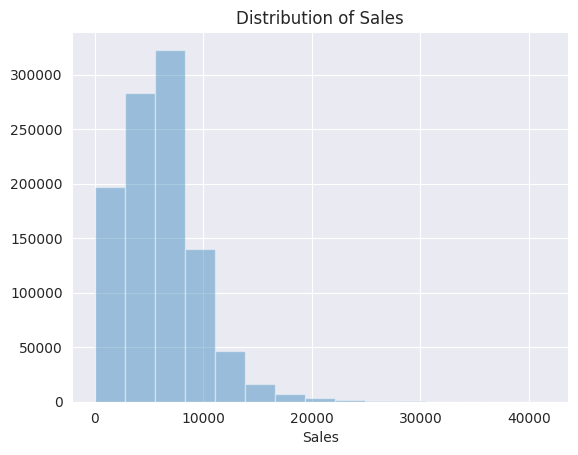

In [38]:
sns.distplot(merged_train_df.Sales,bins=15,kde=False)
plt.title('Distribution of Sales')
plt.plot()

In [39]:
merged_train_df.Date=pd.to_datetime(merged_train_df.Date)

[]

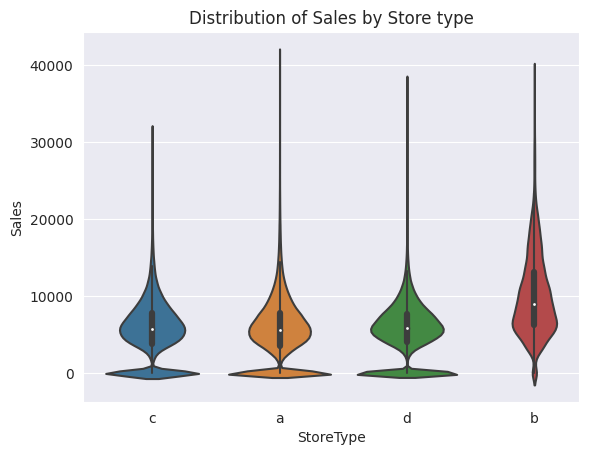

In [52]:
sns.violinplot(merged_train_df,x='StoreType',y='Sales',saturation=.6)
plt.title('Distribution of Sales by Store type')
plt.plot()

[]

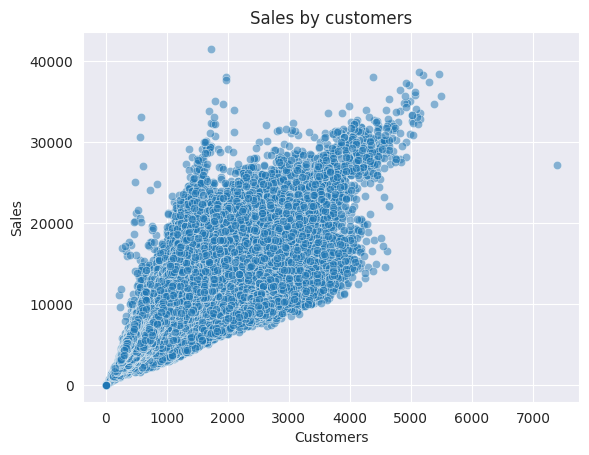

In [57]:
sns.scatterplot(merged_train_df,x='Customers',y='Sales',alpha=0.5)
plt.title('Sales by customers')
plt.plot()

[]

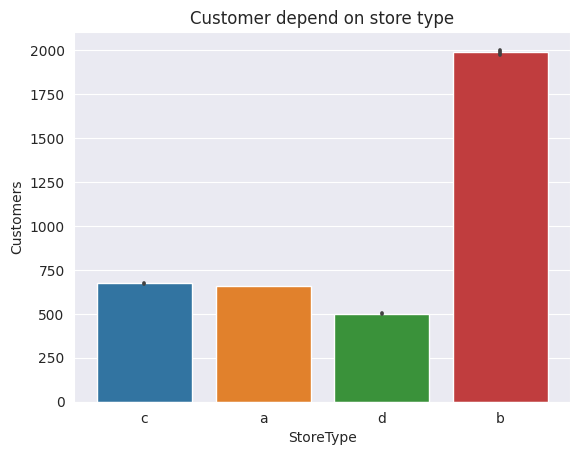

In [62]:
sns.barplot(merged_train_df,x='StoreType',y='Customers')
plt.title('Customer depend on store type')
plt.plot()

[]

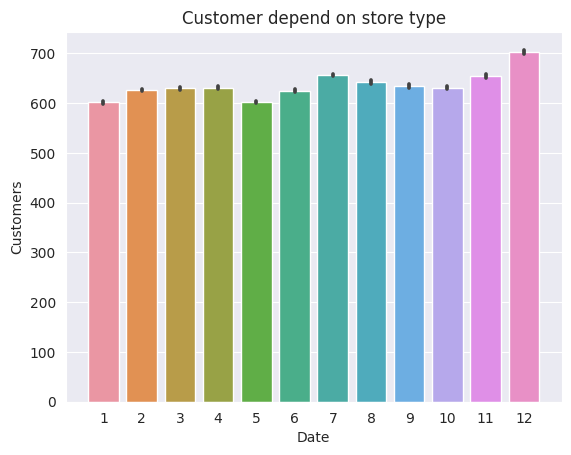

In [63]:
sns.barplot(merged_train_df,x=year,y='Customers')
plt.title('Customer visit month')
plt.plot()

[]

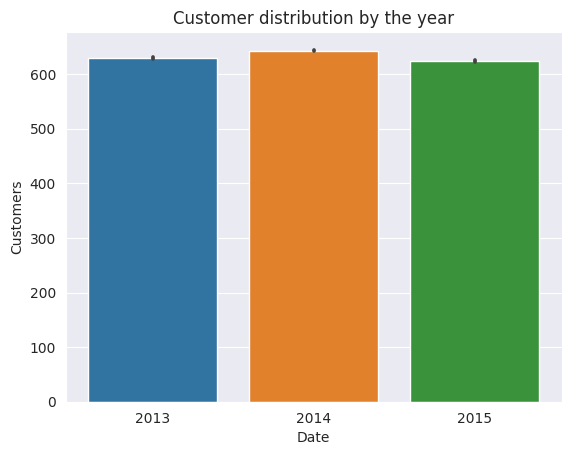

In [64]:
sns.barplot(merged_train_df,x=merged_train_df.Date.dt.year,y='Customers')
plt.title('Customer distribution by the year')
plt.plot()

[]

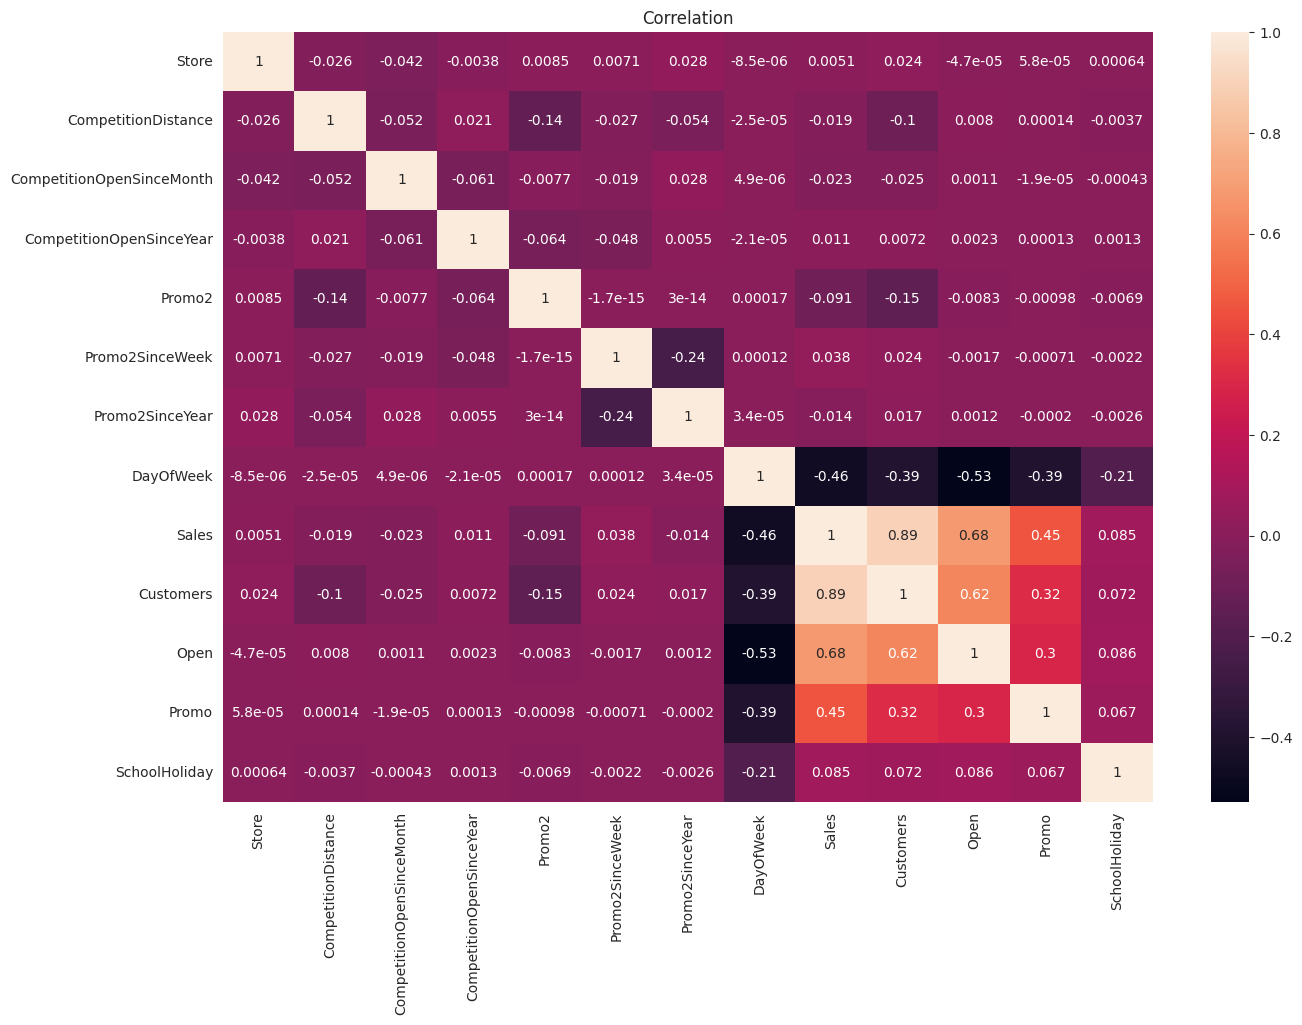

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(merged_train_df[numerical_cols].corr(),annot=True)
plt.title('Correlation')
plt.plot()

In [73]:
numerical_cols=merged_train_df.select_dtypes(np.number).columns.tolist()
categorical_cols=merged_train_df.select_dtypes('object').columns.tolist()

In [74]:
numerical_cols

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday']

In [75]:
categorical_cols

['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']

In [79]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
merged_train_df[numerical_cols]=imputer.fit_transform(merged_train_df[numerical_cols])

In [78]:
imputer=SimpleImputer(strategy='most_frequent')
merged_train_df[categorical_cols]=imputer.fit_transform(merged_train_df[categorical_cols])

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
merged_train_df[numerical_cols]=scaler.fit_transform(merged_train_df[numerical_cols])

In [81]:
merged_train_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0.0,c,a,0.016482,0.727273,0.93913,0.0,0.454471,0.458796,"Jan,Apr,Jul,Oct",0.666667,2015-07-31,0.126664,0.075122,1.0,1.0,0,1.0
1,0.0,c,a,0.016482,0.727273,0.93913,0.0,0.454471,0.458796,"Jan,Apr,Jul,Oct",0.500000,2015-07-30,0.120815,0.073904,1.0,1.0,0,1.0
2,0.0,c,a,0.016482,0.727273,0.93913,0.0,0.454471,0.458796,"Jan,Apr,Jul,Oct",0.333333,2015-07-29,0.115087,0.070790,1.0,1.0,0,1.0
3,0.0,c,a,0.016482,0.727273,0.93913,0.0,0.454471,0.458796,"Jan,Apr,Jul,Oct",0.166667,2015-07-28,0.120599,0.075799,1.0,1.0,0,1.0
4,0.0,c,a,0.016482,0.727273,0.93913,0.0,0.454471,0.458796,"Jan,Apr,Jul,Oct",0.000000,2015-07-27,0.146856,0.082837,1.0,1.0,0,1.0


In [85]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
for cols in categorical_cols:
    merged_train_df[cols]=encoder.fit_transform(merged_train_df[cols].values.reshape(1,-1)).toarray().reshape(-1)

In [119]:
X=merged_train_df[['Store','StoreType', 'Assortment','DayOfWeek','CompetitionOpenSinceYear','Promo2SinceWeek','Open','Promo','SchoolHoliday','StateHoliday']]
y=merged_train_df['Sales']

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [121]:
x_train,x_test,val_train,val_test=train_test_split(X_train,y_train,random_state=34,test_size=0.2)

In [122]:
x_train.shape,y_train.shape,val_train.shape

((569636, 10), (712046,), (569636,))

In [127]:
from xgboost import XGBRegressor
regressor=XGBRegressor(n_estimators=16,n_jobs=6,max_depth=5)

In [128]:
regressor.fit(x_train,val_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=16, n_jobs=6,
             num_parallel_tree=None, random_state=None, ...)

In [132]:
val_pred=regressor.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,val_pred)
score=r2_score(y_test,val_pred)
print(f"Mean Squared Error: {mse}")
print(f'R2 Score: {score}')

Mean Squared Error: 0.003150840993783976
R2 Score: 0.6320317037864277
